# Analysis 4 - Green Taxi Rides Comparison with Weather Changes

In [1]:
# Step 1 - Merge the CSV Files to take the Trip Data from all the Files
import glob
import pandas as pd
from pandas import DataFrame
frame = pd.DataFrame()
list=[]
for files in glob.iglob("../../Data/RawGreen/*.csv"):
    df = pd.read_csv(files,sep=',')[['lpep_pickup_datetime']]
    list.append(df)
frame = pd.concat(list)


In [3]:
frame['pickup_date']=pd.to_datetime(frame['lpep_pickup_datetime']).dt.date

In [5]:
# Step 2 - Count The No of Rides for every Date
ridesCount=frame.groupby(['pickup_date'])['pickup_date'].agg({'count','count'}).reset_index()

In [9]:
# Step 3 - Read the Weather Data 
weather=pd.read_csv("../../Data/Weather/weather.csv",sep=',')[['CLDATE','PRCP','SNWD','SNOW']]
weather['CLDATE']=pd.to_datetime(weather['CLDATE']).dt.date

In [11]:
#Step 4 - Join the Weather Data with the Ride Counts
joinResult=pd.merge(ridesCount, weather, how = 'right', left_on = 'pickup_date', right_on = 'CLDATE').fillna(0)
weather_pick=DataFrame(joinResult,columns=['CLDATE','count','PRCP','SNWD','SNOW'])
weather_pick.to_csv("output/weather_rides.csv",sep=",")

In [26]:
#Step 6 - Using Numpy Bins to Segregate precitation data
import numpy as np
prcpbins = [0.0, 1.0, 2.0, 3.0]
prcpData=DataFrame(weather_pick)
prcp_group_names = ['0 - 1', '1 - 2', '2 - 3']
prcpData['conditions'] = pd.cut(prcpData['PRCP'], prcpbins, labels=prcp_group_names)
sp=prcpData[['count','conditions']].groupby(['conditions']).sum()
sp.reset_index()
sp.to_csv("output/precipitation.csv")

In [29]:
#Step 7 - Using Numpy Bins to Segregate Snow data
import numpy as np
snowbins = [0.0,5.0,10.0,15.0,20.0,25.0]
snowData=DataFrame(weather_pick)
snow_group_names = ['0 - 5', '5 - 10', '10 - 15','15 - 20', '20 - 25']
snowData['conditions'] = pd.cut(snowData['SNWD'], snowbins, labels=snow_group_names)
sd=snowData[['count','conditions']].groupby(['conditions']).sum().fillna(0)
sd.reset_index()
sd.to_csv("output/snow.csv")

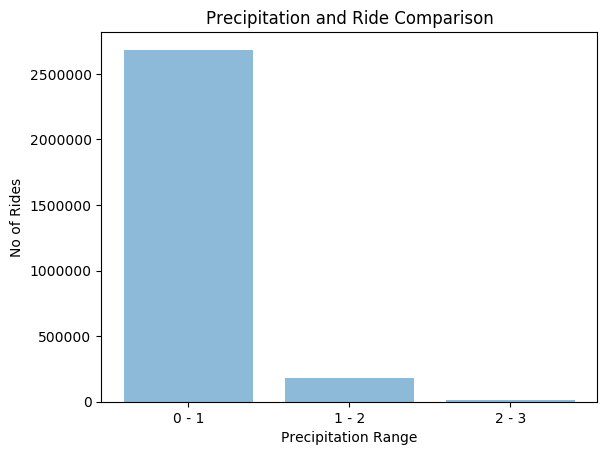

In [32]:
#Plot of compare Climatic data Precipitation with Rides

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
sf=pd.read_csv("output/precipitation.csv",sep=",")
objects = sf['conditions'].tolist()
y_pos = np.arange(len(objects))
performance = sf['count'].tolist()
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('No of Rides')
plt.xlabel("Precipitation Range")
plt.title("Precipitation and Ride Comparison")
fig1 = plt.gcf()
fig1.savefig("graph/precipitation_ride.png")
plt.show()

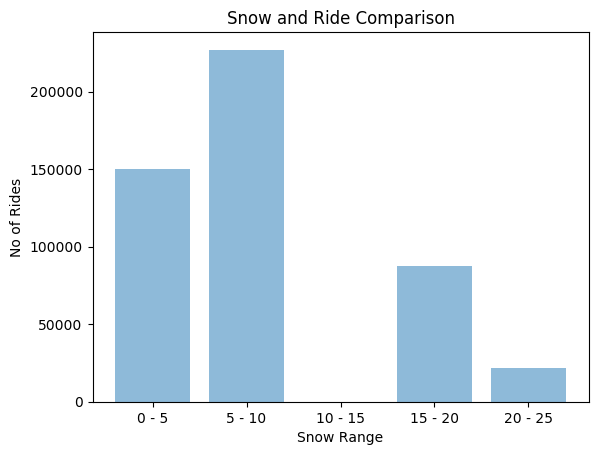

In [33]:
#Plot of compare Climatic data Snow with Rides

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
sn=pd.read_csv("output/snow.csv",sep=",")
objects = sn['conditions'].tolist()
y_pos = np.arange(len(objects))
performance = sn['count'].tolist()
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('No of Rides')
plt.xlabel("Snow Range")
plt.title("Snow and Ride Comparison")
fig1 = plt.gcf()
fig1.savefig("graph/snow_ride.png")
plt.show()